In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import joblib

In [2]:
simulations = joblib.load('../data/processed2/2019_simulations_v2_3.joblib')
simulations1 = joblib.load('../data/processed2/2019_simulations_v4_3.joblib')
df_results = pd.read_csv('../data/processed2/2019_f5_scores.csv', index_col=0)

In [3]:
games = list(simulations.keys())

In [4]:
a = set(games)
b = set(df_results.index)

In [5]:
do_not_include = list(a.symmetric_difference(b))

In [6]:
df_results = df_results.loc[[game for game in games if game not in do_not_include]]

In [7]:
rand_results = {}
spread_median = {}
total_median = {}
rand_results1 = {}
spread_median1 = {}
total_median1 = {}
for game in a:
    if game in do_not_include:
        continue
    z = simulations[game].shape[0]
    z1 = simulations1[game].shape[0]
    rand_results[game] = simulations[game][np.random.choice(z)]
    spread_median[game] = np.median(simulations[game][:, 1] - simulations[game][:, 0])
    total_median[game] = np.median(simulations[game][:, 1] + simulations[game][:, 0])
    rand_results1[game] = simulations1[game][np.random.choice(z1)]
    spread_median1[game] = np.median(simulations1[game][:, 1] - simulations1[game][:, 0])
    total_median1[game] = np.median(simulations1[game][:, 1] + simulations1[game][:, 0])

In [8]:
df_median_results = pd.DataFrame({'spread_median' : spread_median, 'total_median' : total_median, 'spread_median1' : spread_median1, 'total_median1' : total_median1})

In [9]:
df_rand_results = pd.DataFrame(rand_results).T
df_rand_results.columns = ['visiting_score_rand', 'home_score_rand']
df_rand_results1 = pd.DataFrame(rand_results1).T
df_rand_results1.columns = ['visiting_score_rand1', 'home_score_rand1']
df_rand = pd.concat((df_rand_results, df_rand_results1), axis=1)

In [10]:
df = pd.concat((df_results, df_rand, df_median_results), axis=1)

In [11]:
df

,visiting_score,home_score,visiting_score_rand,home_score_rand,visiting_score_rand1,home_score_rand1,spread_median,total_median,spread_median1,total_median1
MIA201904150,5,2,3.0,1.0,2.0,6.0,1.0,4.0,0.0,4.0
MIL201904150,3,6,4.0,3.0,1.0,0.0,0.0,5.0,0.0,3.0
MIN201904150,1,3,1.0,2.0,3.0,2.0,0.0,5.0,1.0,4.0
PHI201904150,5,5,1.0,0.0,1.0,0.0,-1.0,5.0,1.0,3.0
SDN201904150,2,1,4.0,2.0,2.0,1.0,1.0,4.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...
SFN201909290,5,0,5.0,4.0,1.0,0.0,-1.0,4.0,-1.0,4.0
SLN201909290,0,9,0.0,0.0,0.0,2.0,0.0,4.0,0.0,3.0
TEX201909290,1,5,11.0,2.0,1.0,0.0,0.0,4.0,0.0,3.0
TOR201909290,1,5,0.0,3.0,1.0,2.0,-1.0,5.0,-1.0,4.0


In [12]:
df['actual_spread'] = df['home_score'] - df['visiting_score']
df['rand_spread'] = df['home_score_rand'] - df['visiting_score_rand']
df['actual_total'] = df['home_score'] + df['visiting_score']
df['rand_total'] = df['home_score_rand'] + df['visiting_score_rand']
df['rand_spread1'] = df['home_score_rand1'] - df['visiting_score_rand1']
df['rand_total1'] = df['home_score_rand1'] + df['visiting_score_rand1']


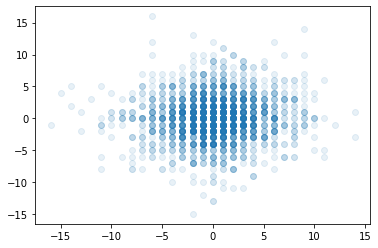

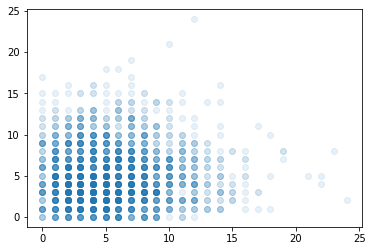

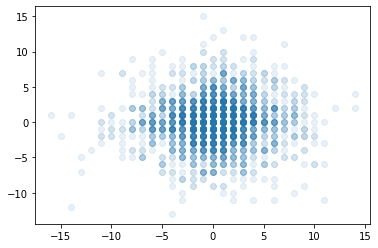

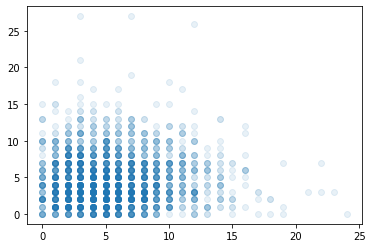

In [13]:
plt.scatter(df['actual_spread'], df['rand_spread'],alpha=0.1)
plt.show()

plt.scatter(df['actual_total'], df['rand_total'],alpha=0.1)
plt.show()

plt.scatter(df['actual_spread'], df['rand_spread1'],alpha=0.1)
plt.show()

plt.scatter(df['actual_total'], df['rand_total1'],alpha=0.1)
plt.show()

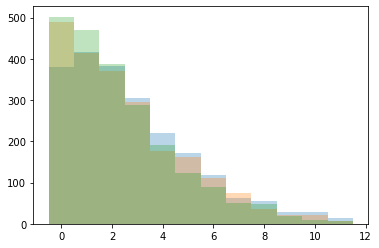

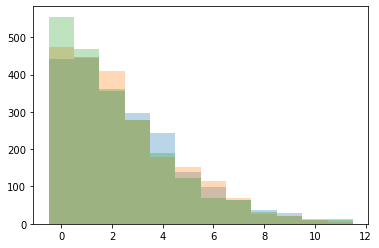

In [14]:
bins = np.linspace(-0.5, 11.5, 13)
plt.hist(df['home_score'], bins, alpha=0.3) 
plt.hist(df['home_score_rand'], bins, alpha=0.3)
plt.hist(df['home_score_rand1'], bins, alpha=0.3)
plt.show()

bins = np.linspace(-0.5, 11.5, 13)
plt.hist(df['visiting_score'], bins, alpha=0.3) 
plt.hist(df['visiting_score_rand'], bins, alpha=0.3)
plt.hist(df['visiting_score_rand1'], bins, alpha=0.3)
plt.show()

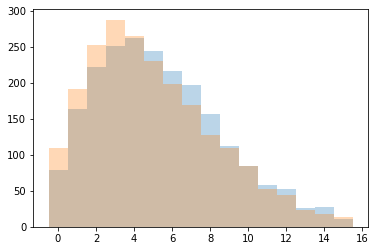

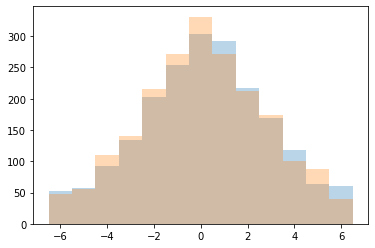

In [28]:
bins = np.linspace(-0.5, 15.5, 17)
plt.hist(df['actual_total'], bins, alpha=0.3) 
plt.hist(df['rand_total'], bins, alpha=0.3)
#plt.hist(df['rand_total1'], bins, alpha=0.3)
plt.show()

bins = np.linspace(-6.5, 6.5, 14)
plt.hist(df['actual_spread'], bins, alpha=0.3) 
plt.hist(df['rand_spread'], bins, alpha=0.3)
#plt.hist(df['rand_spread1'], bins, alpha=0.3)
plt.show()

In [16]:
df['correct_spread'] = np.sign(df['actual_spread']) * np.sign(df['rand_spread'])
df['correct_spread1'] = np.sign(df['actual_spread']) * np.sign(df['rand_spread1'])

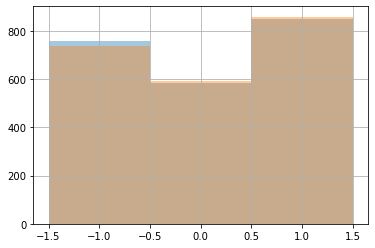

In [17]:
df['correct_spread'].hist(bins=[-1.5, -0.5, 0.5, 1.5], alpha=0.4)
df['correct_spread1'].hist(bins=[-1.5, -0.5, 0.5, 1.5], alpha=0.4)
plt.show()

In [18]:
print(df['correct_spread'].sum())
print(df['correct_spread1'].sum())

90.0
121.0


In [19]:
df

,visiting_score,home_score,visiting_score_rand,home_score_rand,visiting_score_rand1,home_score_rand1,spread_median,total_median,spread_median1,total_median1,actual_spread,rand_spread,actual_total,rand_total,rand_spread1,rand_total1,correct_spread,correct_spread1
MIA201904150,5,2,3.0,1.0,2.0,6.0,1.0,4.0,0.0,4.0,-3,-2.0,7,4.0,4.0,8.0,1.0,-1.0
MIL201904150,3,6,4.0,3.0,1.0,0.0,0.0,5.0,0.0,3.0,3,-1.0,9,7.0,-1.0,1.0,-1.0,-1.0
MIN201904150,1,3,1.0,2.0,3.0,2.0,0.0,5.0,1.0,4.0,2,1.0,4,3.0,-1.0,5.0,1.0,-1.0
PHI201904150,5,5,1.0,0.0,1.0,0.0,-1.0,5.0,1.0,3.0,0,-1.0,10,1.0,-1.0,1.0,-0.0,-0.0
SDN201904150,2,1,4.0,2.0,2.0,1.0,1.0,4.0,0.0,4.0,-1,-2.0,3,6.0,-1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SFN201909290,5,0,5.0,4.0,1.0,0.0,-1.0,4.0,-1.0,4.0,-5,-1.0,5,9.0,-1.0,1.0,1.0,1.0
SLN201909290,0,9,0.0,0.0,0.0,2.0,0.0,4.0,0.0,3.0,9,0.0,9,0.0,2.0,2.0,0.0,1.0
TEX201909290,1,5,11.0,2.0,1.0,0.0,0.0,4.0,0.0,3.0,4,-9.0,6,13.0,-1.0,1.0,-1.0,-1.0
TOR201909290,1,5,0.0,3.0,1.0,2.0,-1.0,5.0,-1.0,4.0,4,3.0,6,3.0,1.0,3.0,1.0,1.0


In [20]:
spread_fit = LinearRegression().fit(df['spread_median'].values.reshape((-1,1)), df['actual_spread'])
total_fit = LinearRegression().fit(df['total_median'].values.reshape((-1,1)), df['actual_total'])
spread_fit1 = LinearRegression().fit(df['spread_median1'].values.reshape((-1,1)), df['actual_spread'])
total_fit1 = LinearRegression().fit(df['total_median1'].values.reshape((-1,1)), df['actual_total'])

In [21]:
print(spread_fit.coef_[0])
print(spread_fit1.coef_[0])

print(total_fit.coef_[0])
print(total_fit1.coef_[0])

0.58612681131109
0.6731837110549012
0.27443054282584367
0.424476219211551


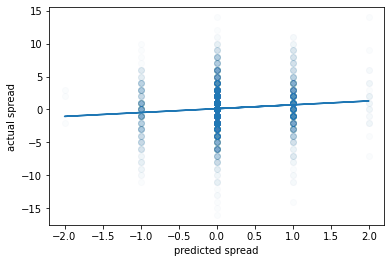

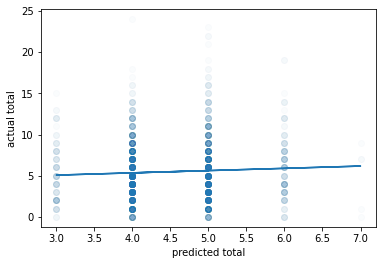

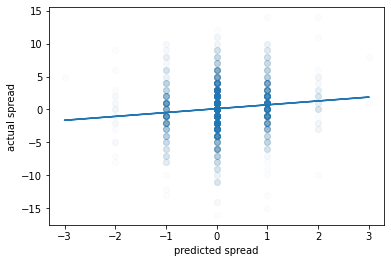

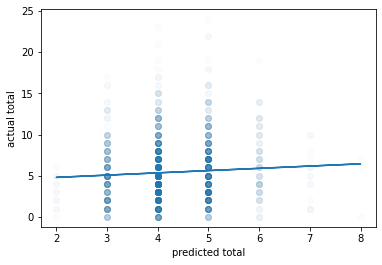

In [22]:
plt.scatter(df['spread_median'], df['actual_spread'],alpha=0.02)
plt.plot(df['spread_median'], spread_fit.predict(df['spread_median'].values.reshape(-1,1)))
plt.ylabel('actual spread')
plt.xlabel('predicted spread')
plt.show()

plt.scatter(df['total_median'], df['actual_total'],alpha=0.02)
plt.plot(df['total_median'], total_fit.predict(df['total_median'].values.reshape(-1,1)))
plt.ylabel('actual total')
plt.xlabel('predicted total')
plt.show()

plt.scatter(df['spread_median1'], df['actual_spread'],alpha=0.02)
plt.plot(df['spread_median1'], spread_fit.predict(df['spread_median1'].values.reshape(-1,1)))
plt.ylabel('actual spread')
plt.xlabel('predicted spread')
plt.show()

plt.scatter(df['total_median1'], df['actual_total'],alpha=0.02)
plt.plot(df['total_median1'], total_fit.predict(df['total_median1'].values.reshape(-1,1)))
plt.ylabel('actual total')
plt.xlabel('predicted total')
plt.show()

In [23]:
df['correct_spread_2'] = np.sign(df['spread_median'])*np.sign(-np.sign(df['spread_median'])*0.5+df['actual_spread'])

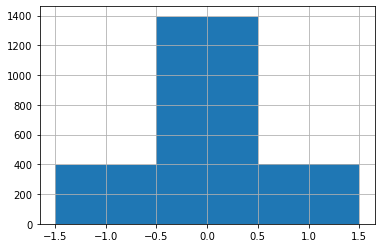

In [24]:
df['correct_spread_2'].hist(bins=[-1.5, -0.5, 0.5, 1.5])

In [25]:
df['correct_spread_2'].sum()

6.0

In [26]:
df_totals = pd.read_csv('../data/processed2/2019_f5_totals.csv', index_col=0)

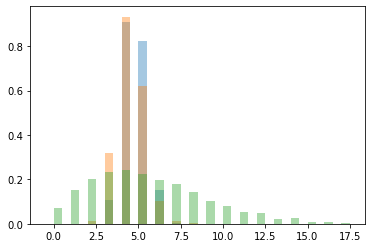

In [27]:
bins = np.linspace(-0.5, 17.5, 37)
plt.hist(df['total_median'], bins, density=True, alpha=0.4)
plt.hist(df['total_median1'], bins, density=True, alpha=0.4)
#plt.hist(df_totals['F5 Total'], bins, density=True, alpha=0.4)
plt.hist(df['actual_total'], bins, density=True, alpha=0.4)
plt.show()

In [38]:
bins = np.linspace(-0.5, 17.5, 37)

In [39]:
np.quantile(df['actual_total'], q=[0.25, 0.5, 0.75])

array([3., 5., 8.])

In [153]:
df = pd.concat((df, df_totals), axis=1)
df

,visiting_score,home_score,visiting_score_rand,home_score_rand,spread_median,total_median,actual_spread,rand_spread,actual_total,rand_total,correct_spread,correct_spread_2,F5 Total
ANA201904180,5.0,2.0,0.0,2.0,0.0,3.0,-3.0,2.0,7.0,2.0,-1.0,-0.0,5.5
ANA201904190,3.0,1.0,0.0,5.0,-1.0,4.0,-2.0,5.0,4.0,5.0,-1.0,1.0,5.0
ANA201904200,5.0,4.0,1.0,3.0,0.0,4.0,-1.0,2.0,9.0,4.0,-1.0,-0.0,5.0
ANA201904210,1.0,3.0,1.0,3.0,1.0,4.0,2.0,2.0,4.0,4.0,1.0,1.0,5.0
ANA201904220,2.0,2.0,2.0,1.0,0.0,4.0,0.0,-1.0,4.0,3.0,-0.0,0.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TEX201904140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.5
CHA201904150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.5
BOS201904150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
CLE201905090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
